<a href="https://colab.research.google.com/github/shambhavi1708/disease-detection-system/blob/main/Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

In [26]:
df = pd.read_csv('/content/parkinsons.csv')

In [27]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [28]:
df.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [29]:
X = df.drop(columns=['name', 'status'], axis=1)
Y = df['status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
svm_model = svm.SVC(kernel='linear', probability=True, random_state=0)
svm_model.fit(X_train, Y_train)

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, Y_train)

log_reg_model = LogisticRegression(max_iter=1000, random_state=0)
log_reg_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [32]:
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
log_reg_pred = log_reg_model.predict(X_test)

In [33]:
svm_acc = accuracy_score(Y_test, svm_pred) * 100
rf_acc = accuracy_score(Y_test, rf_pred) * 100
log_acc = accuracy_score(Y_test, log_reg_pred) * 100

In [34]:
print("\nModel Accuracy Scores:")
print(f"- SVM Accuracy: {svm_acc:.2f}%")
print(f"- Random Forest Accuracy: {rf_acc:.2f}%")
print(f"- Logistic Regression Accuracy: {log_acc:.2f}%")


Model Accuracy Scores:
- SVM Accuracy: 87.18%
- Random Forest Accuracy: 84.62%
- Logistic Regression Accuracy: 82.05%


In [35]:
models = {"SVM": svm_model, "Random Forest": rf_model, "Logistic Regression": log_reg_model}
print("\n🔹 Parkinson’s Disease Model Performance:")
print(f"{'Model':<20}{'Precision':<15}{'Recall':<15}{'F1-Score':<15}")

for model_name, model in models.items():
    Y_pred = model.predict(X_test)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    print(f"{model_name:<20}{precision:<15.2f}{recall:<15.2f}{f1:<15.2f}")


🔹 Parkinson’s Disease Model Performance:
Model               Precision      Recall         F1-Score       
SVM                 0.91           0.94           0.92           
Random Forest       0.90           0.90           0.90           
Logistic Regression 0.90           0.87           0.89           


<ipython-input-36-a380d0e1f49f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


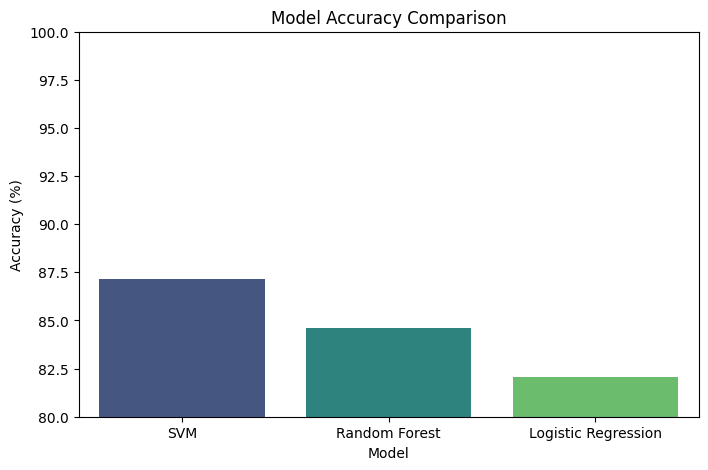

In [36]:
# Accuracy Comparison Graph
plt.figure(figsize=(8, 5))
models = ['SVM', 'Random Forest', 'Logistic Regression']
accuracies = [svm_acc, rf_acc, log_acc]
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(80, 100)  # Adjust scale if needed
plt.show()

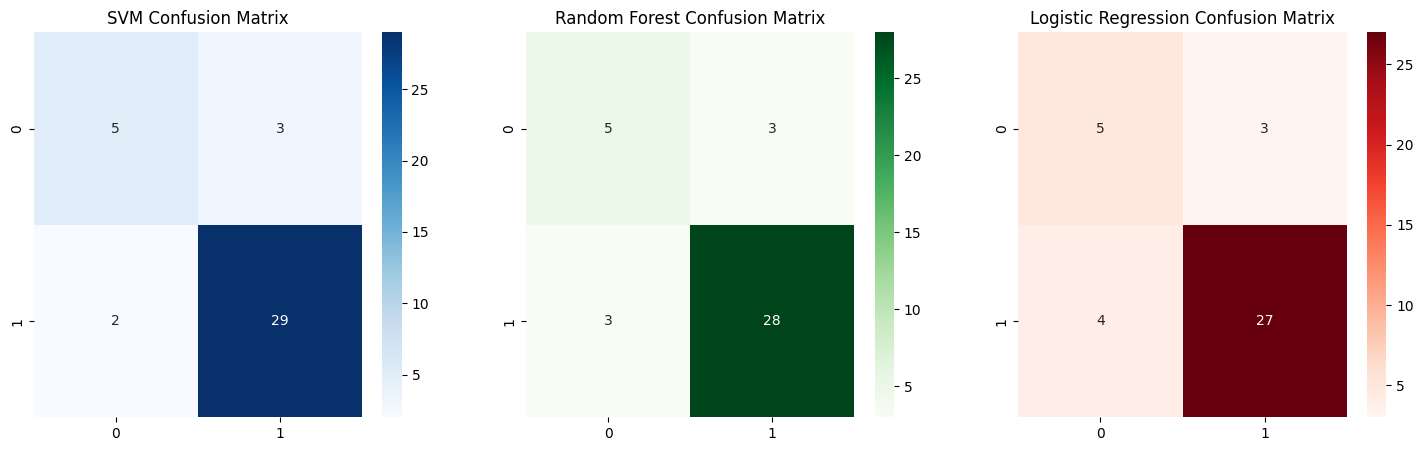

In [37]:
# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(confusion_matrix(Y_test, svm_pred), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("SVM Confusion Matrix")

sns.heatmap(confusion_matrix(Y_test, rf_pred), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")

sns.heatmap(confusion_matrix(Y_test, log_reg_pred), annot=True, fmt="d", cmap="Reds", ax=axes[2])
axes[2].set_title("Logistic Regression Confusion Matrix")

plt.show()

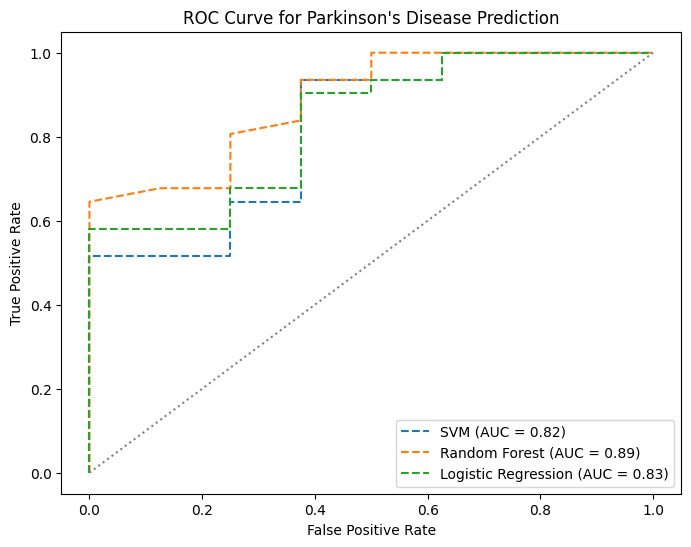

In [38]:
#  ROC Curve
svm_probs = svm_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
log_reg_probs = log_reg_model.predict_proba(X_test)[:, 1]

# Compute ROC curves
svm_fpr, svm_tpr, _ = roc_curve(Y_test, svm_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
log_fpr, log_tpr, _ = roc_curve(Y_test, log_reg_probs)

# Compute AUC scores
svm_auc = auc(svm_fpr, svm_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
log_auc = auc(log_fpr, log_tpr)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', linestyle='--')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', linestyle='--')
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], color='gray', linestyle='dotted')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Parkinson's Disease Prediction")
plt.legend()
plt.show()